In [190]:
import csv 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic

## Question 1

In [191]:
# read the csv into a dataframe
with open('stat_dec.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

# use the first row as the headings of the dataframe
headers = data.pop(0)

# create a dataframe from the data
df = pd.DataFrame(data, columns=headers)

df

,x1,x2,x3,x4
0,1,1,1,1
1,2.022196848,7.103307109,1.261218603,7.403307109
2,2.681359021,7.161497652,1.522437206,7.403307109
3,3.18035974,7.192361179,1.783655809,7.403307109
4,3.587617133,7.21450403,2.044874412,7.403307109
...,...,...,...,...
95,16.41238287,12.78549597,11.16344191,17.93278215
96,16.81964026,12.80763882,10.90222331,18.19958661
97,17.31864098,12.83850235,10.64100471,18.46639107
98,17.97780315,12.89669289,10.3797861,18.73319554


In [192]:
# convert all the values to numeric
df = df.apply(pd.to_numeric)

### Trying a Box Plot

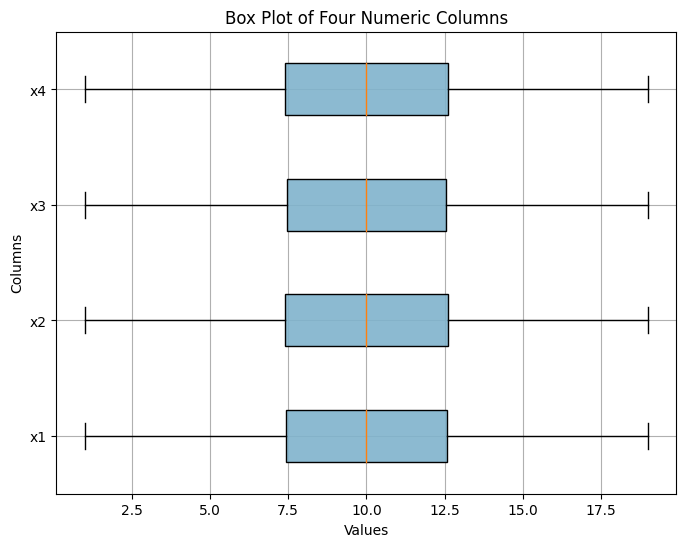

In [193]:
plt.figure(figsize=(8, 6))
bp = plt.boxplot(df.values, labels=df.columns, vert=False, patch_artist=True)
plt.xlabel('Values')
plt.ylabel('Columns')
plt.title('Box Plot of Four Numeric Columns')
plt.grid(True)

# Reduce the opacity of the boxes
for box in bp['boxes']:
    box.set_facecolor((0.5,0.7,0.8,0.9))  # RGBA color (blue with 0.5 opacity)

plt.show()

This is the 'misleading' visualisation of the given data. <br>From looking at this alone, the four distributions look identical, given that they have the same median and the same quartile distribution. <br><br>
While it is the case that the medians and quartles may be the same, the distributions may not be. <br><br>
To investigate further, we can plot a violin plot to see the distribution of the data.

### Trying a Violin Plot

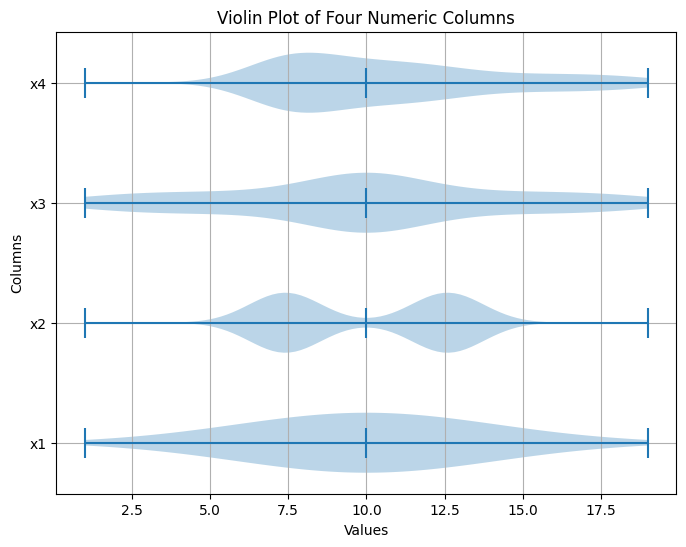

In [194]:
# plot a violin plot

plt.figure(figsize=(8, 6))
plt.violinplot(df.values, showmedians=True, vert=False)
plt.yticks(range(1, len(df.columns) + 1), df.columns)  # Add 1 to the range
plt.xlabel('Values')
plt.ylabel('Columns')
plt.title('Violin Plot of Four Numeric Columns')
plt.grid(True)

plt.show()

### Trying a Scatter Plot

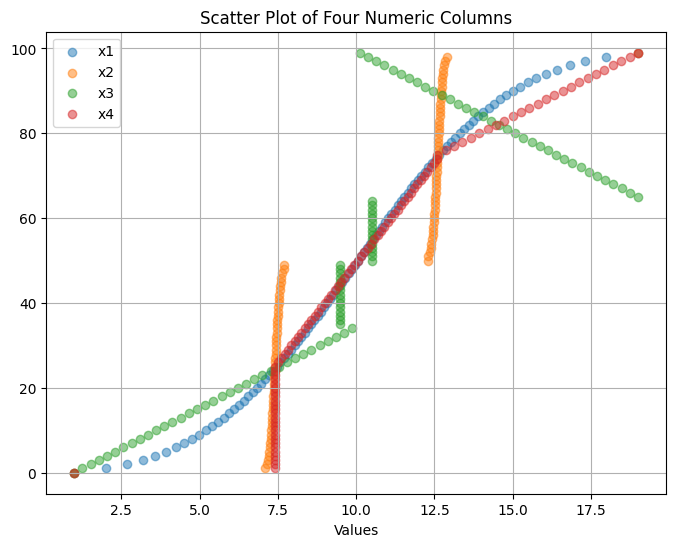

In [195]:
# the df has four columns, each of whose values ranges from 0 to 20
# plot a scatter plot with differnet colors for each column

plt.figure(figsize=(8, 6))

plt.scatter(df['x1'], range(100), label='x1', alpha=0.5)
plt.scatter(df['x2'], range(100), label='x2', alpha=0.5)
plt.scatter(df['x3'], range(100), label='x3', alpha=0.5)
plt.scatter(df['x4'], range(100), label='x4', alpha=0.5)

plt.xlabel('Values')
plt.title('Scatter Plot of Four Numeric Columns')

plt.legend(loc='upper left')
plt.grid(True)

plt.show()

Thus, we see that the four distributions are very different, which is very clear from plotting the scatter plot. <br>
This is the difference highlighted in the violin plot.

We see the box plot shows a very different story from the violin plot which also highlights the distribution of the data.<br>
While they have the same medians and the same quartiles, the violin plot shows that the distributions are very different.<br><br>
In x2 there are two 'peaks', which is not observed in any other, for instance. Also, as an example, x3 is less distributed than x1.<br><br>
Hence, box plot would be a poor choice for visualising this data, as all the distributions have the same median and quartiles, and hence it does not show the distribution of the data, which is actually quite different.<br><br>
A violin plot is an optimal choice, as it shows the distribution of the data better. The scatter plot may be useful to see that the ditributions are different, but do not allow for critical analysis of the results, as it is not easy to visually process.<br><br>
Hence, violin plot is the best visualisation in this case.

## Question 2

In [196]:
# import data from csv and convert to df
with open('mov_res.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

headers = data.pop(0)

df = pd.DataFrame(data, columns=headers)

df

,Movements,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,Root,0.139050161,0,0.325480851,0.147281192,0.169475422
1,Hips,0.530088837,0.477398114,0.804276561,0.547530081,0.68641286
2,Knee,0.869003557,1,0.662190543,0.936127255,1
3,Ankle,0.96498963,0.723205153,0.638735797,1,0.735432614
4,Toe,0.98243019,0.590160293,0.851289335,0.893271647,0.970388683
5,Torso,0.551035573,0.37263471,0.489919632,0.638199361,0.611515774
6,Neck,0,0.057603564,0,0,0
7,Head,0.837629806,0.502632424,0.839597601,0.555688749,0.797577367
8,Shoulder,0.318784736,0.540544338,0.844911601,0.418394654,0.347726941
9,Elbow,0.861449553,0.613710806,1,0.941450469,0.902487696


In [197]:
# convert the values of column 1-5 to numeric
df.iloc[:, 1:5] = df.iloc[:, 1:5].apply(pd.to_numeric)

df

,Movements,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,Root,0.13905,0.0,0.325481,0.147281,0.169475422
1,Hips,0.530089,0.477398,0.804277,0.54753,0.68641286
2,Knee,0.869004,1.0,0.662191,0.936127,1
3,Ankle,0.96499,0.723205,0.638736,1.0,0.735432614
4,Toe,0.98243,0.59016,0.851289,0.893272,0.970388683
5,Torso,0.551036,0.372635,0.48992,0.638199,0.611515774
6,Neck,0.0,0.057604,0.0,0.0,0
7,Head,0.83763,0.502632,0.839598,0.555689,0.797577367
8,Shoulder,0.318785,0.540544,0.844912,0.418395,0.347726941
9,Elbow,0.86145,0.613711,1.0,0.94145,0.902487696


### A. Plotting using a polar plot

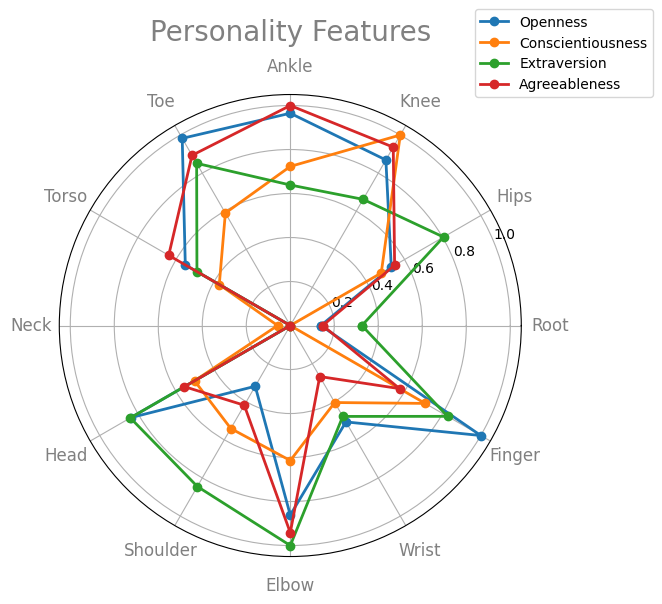

In [198]:
# Get the list of personality features
features = df.columns[1:5]

# Define the theta
theta = np.arange(len(df) + 1) / float(len(df)) * 2 * np.pi

# Create a figure and polar projection
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='polar')

# Iterate over the features
for feature in features:
    # Get the values for the current feature
    values = df[feature]
    values = np.append(values, values[0])

    # Plot the values
    ax.plot(theta, values, linewidth=2, marker='o', label=feature)

# Set the xticks
plt.xticks(theta[:-1], df['Movements'], color='grey', size=12)
ax.tick_params(pad=10)

# Set the title and legend
plt.title('Personality Features', size=20, color='grey', y=1.1)

# put the legend on the top right
plt.legend(bbox_to_anchor=(1.3,1.2))

# Show the plot
plt.show()

### B. Plotting using a Heatmap

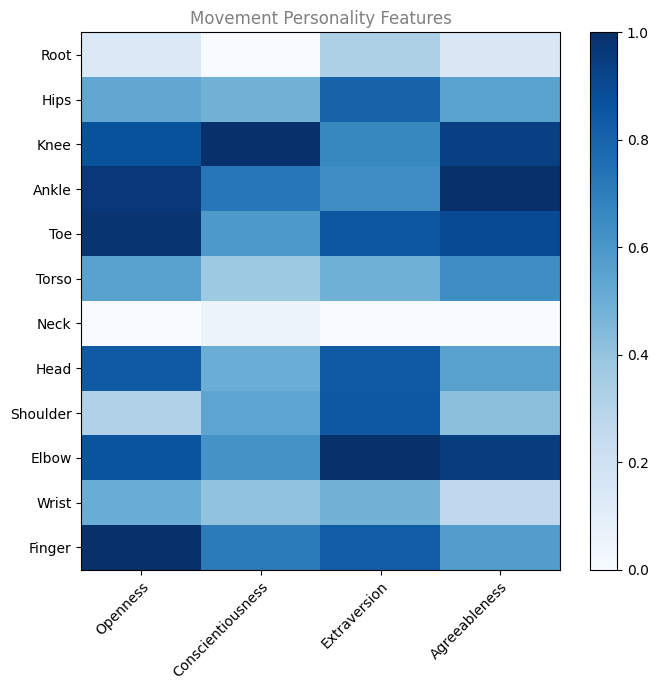

In [199]:
movements = df['Movements']
personality_features = df.columns[1:5]

# make a list of lists for df
df_list = df[personality_features].values.tolist()

df_list = np.array(df_list, dtype=float)

fig, ax = plt.subplots(figsize=(7, 7))  # Adjust figure size here
im = ax.imshow(df_list, aspect='auto', cmap='Blues')  # Set aspect to 'auto' and cmap to 'Blues'

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(personality_features)))
ax.set_xticklabels(personality_features)
ax.set_yticks(np.arange(len(movements)))
ax.set_yticklabels(movements)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Add a colorbar
cbar = fig.colorbar(im)

# add a title
ax.set_title('Movement Personality Features', color = 'grey', y=1.0)

fig.tight_layout()
plt.show()

The two visualisation techniques employed are a <i>polar plot</i> and a <i>heatmap</i>. <br>
The polar plot is more intuitive for this particular data as compared to the heatmap. <br><br>
While the heatmap does give interesting insights, especially since all the values are in the range of 0-1, it is an absolute representation of the correlation of each of the joints to the four personality traitrs.<br><br>
The polar plots also show a <i>relative comparison</i> on the degree that a particular joint is correlated with one personality trait as compared to another personality trai, and hence, it potentially more valuable for comparison in this case.

## Question 3

### Subtask 1: Last of Us

Data given to us:<br><br>
• 118 people from the Safe Zone, who were males, turned into zombies.<br>
• 62 people from the Safe Zone, who were males, survived.<br>
• 4 people from the Safe Zone, who were females, turned into zombies.<br>
• 141 people from the Safe Zone, who were females, survived.<br>
• 154 people from the Contaminated City, who were males, turned into zombies.<br>
• 25 people from the Contaminated City, who were males, survived.<br>
• 13 people from the Contaminated City, who were females, turned into zombies.<br>
• 93 people from the Contaminated City, who were females, survived.<br>
• 422 people from the Rural Area, who were males, turned into zombies.<br>
• 88 people from the Rural Area, who were males, survived.<br>
• 106 people from the Rural Area, who were females, turned into zombies.<br>
• 90 people from the Rural Area, who were females, survived.<br>
• 670 people from the Isolated Island, who were males, turned into zombies.<br>
• 192 people from the Isolated Island, who were males, survived.<br>
• 3 people from the Isolated Island, who were females, turned into zombies.<br>
• 20 people from the Isolated Island, who were females, survived.<br>

This was made into a csv using sheets and saved as last_of_us.csv like below:

Area,Gender,Zombie,0<br>Safe Zone,Male,Turned into Zombie,118<br>Safe Zone,Male,Survived,62<br>Safe Zone,Female,Turned into Zombie,4<br>Safe Zone,Female,Survived,141<br>Contaminated City,Male,Turned into Zombie,154<br>Contaminated City,Male,Survived,25<br>Contaminated City,Female,Turned into Zombie,13<br>Contaminated City,Female,Survived,93<br>Rural Area,Male,Turned into Zombie,422<br>Rural Area,Male,Survived,88<br>Rural Area,Female,Turned into Zombie,106<br>Rural Area,Female,Survived,90<br>Isolated Island,Male,Turned into Zombie,670<br>Isolated Island,Male,Survived,192<br>Isolated Island,Female,Turned into Zombie,3<br>Isolated Island,Female,Survived,20<br>

In [200]:
# Read the CSV into a DataFrame
df = pd.read_csv('last_of_us.csv')

# Set the MultiIndex
df.set_index(["Area", "Gender", "Zombie"], inplace=True)

# Convert the DataFrame back to a Series
series = df.iloc[:, 0]

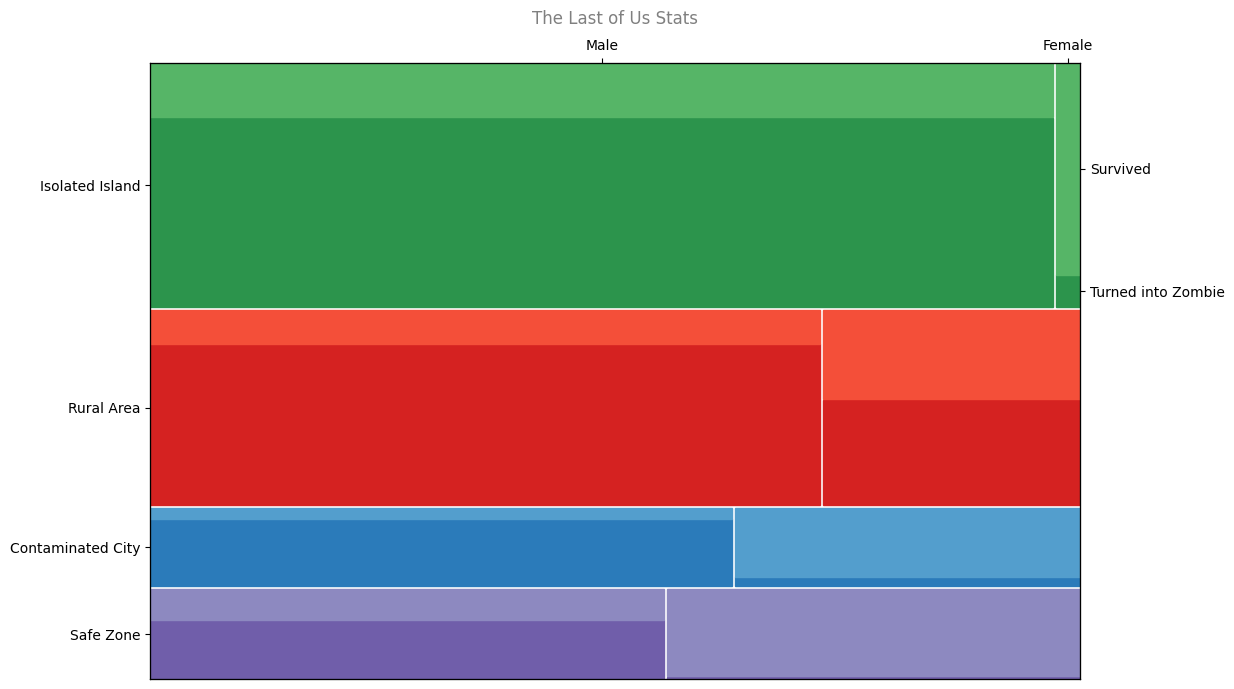

In [201]:
# Define the color scheme with RGB values
color_dict = {
    "Safe Zone": {"Turned into Zombie": sns.color_palette("Purples")[-2], "Survived": sns.color_palette("Purples")[-3]},
    "Contaminated City": {"Turned into Zombie": sns.color_palette("Blues")[-2], "Survived": sns.color_palette("Blues")[-3]},
    "Rural Area": {"Turned into Zombie": sns.color_palette("Reds")[-2], "Survived": sns.color_palette("Reds")[-3]},
    "Isolated Island": {"Turned into Zombie": sns.color_palette("Greens")[-2], "Survived": sns.color_palette("Greens")[-3]}
}

# Define the properties function
def props_func(key):
    area, gender, status = key
    return {'color': color_dict[area][status]}

# Create the mosaic plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
labelizer = lambda k: ""
mosaic(series, ax=ax, horizontal=False, labelizer=labelizer, properties=props_func)
# add title
ax.set_title('The Last of Us Stats', color = 'grey', y=1.05)
plt.show()

Some inferences from this data:
First, that women on average, have much miuch better chances of survival than men in this zombie apocalypse.<br>
Seocnd, that more people live on the isolated island, and least people live in the Safe Zone. Despite this, the contaminated city has the worst chance of surival for men among all.<br>
For women, the rural area has the worst chance of survival.<br><br>
In conclusion, if I ended up in this zombie apocalypse, I would try and get to the safe zone as soon as possible. Being a female, this clearly gives me the best chances of survival among all.

### Subtask 2: Glass Glimpse

In [202]:
# import data from ri.csv
with open('ri.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

headers = data.pop(0)

df = pd.DataFrame(data, columns=headers)

df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0,1
1,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0,0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0,2.88,72.61,0.08,9.18,1.06,0,7
210,1.51685,14.92,0,1.99,73.06,0,8.4,1.59,0,7
211,1.52065,14.36,0,2.02,73.42,0,8.44,1.64,0,7
212,1.51651,14.38,0,1.94,73.61,0,8.48,1.57,0,7


In [203]:
# drop all columns other than RI and Type
df = df.drop(['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], axis=1)

# convert the values to numeric
df = df.apply(pd.to_numeric)
df

,RI,Type
0,1.52101,1
1,1.51761,1
2,1.51618,1
3,1.51766,1
4,1.51742,1
...,...,...
209,1.51623,7
210,1.51685,7
211,1.52065,7
212,1.51651,7


In [204]:
# print the unique values of Type
print(df['Type'].unique())

# from this, we observe that type 4 is missing

[1 2 3 5 6 7]


### Trying bar graph for mean (probably a poor depiction)

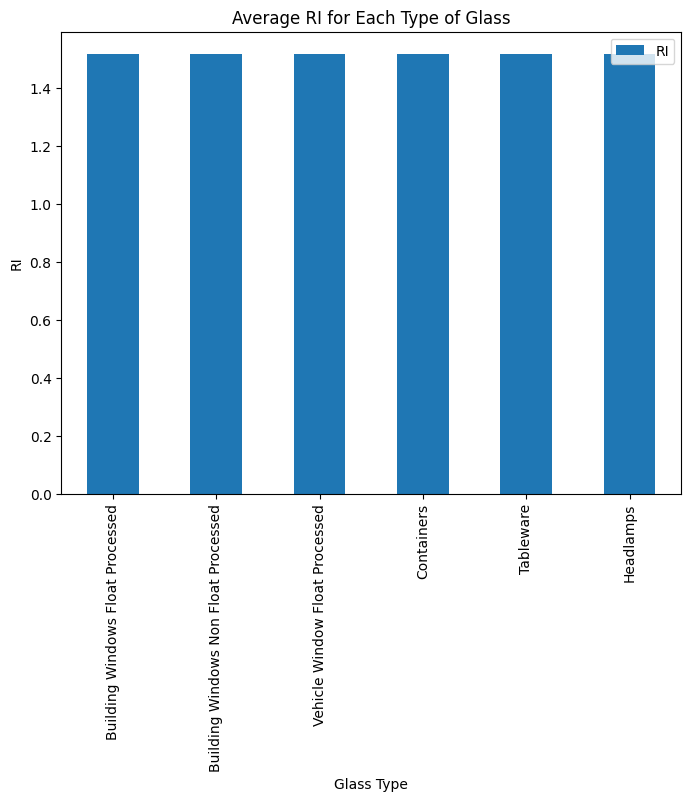

In [205]:
# plot the average RI for each type of glass
df.groupby('Type').mean().plot(kind='bar', figsize=(8, 6))

plt.xlabel('Glass Type')

plt.ylabel('RI')

plt.title('Average RI for Each Type of Glass')

types_map = ['Building Windows Float Processed', 'Building Windows Non Float Processed', 'Vehicle Window Float Processed', 'Containers', 'Tableware', 'Headlamps']

plt.xticks(range(6), types_map, rotation=90)

plt.show()

### Trying a box plot

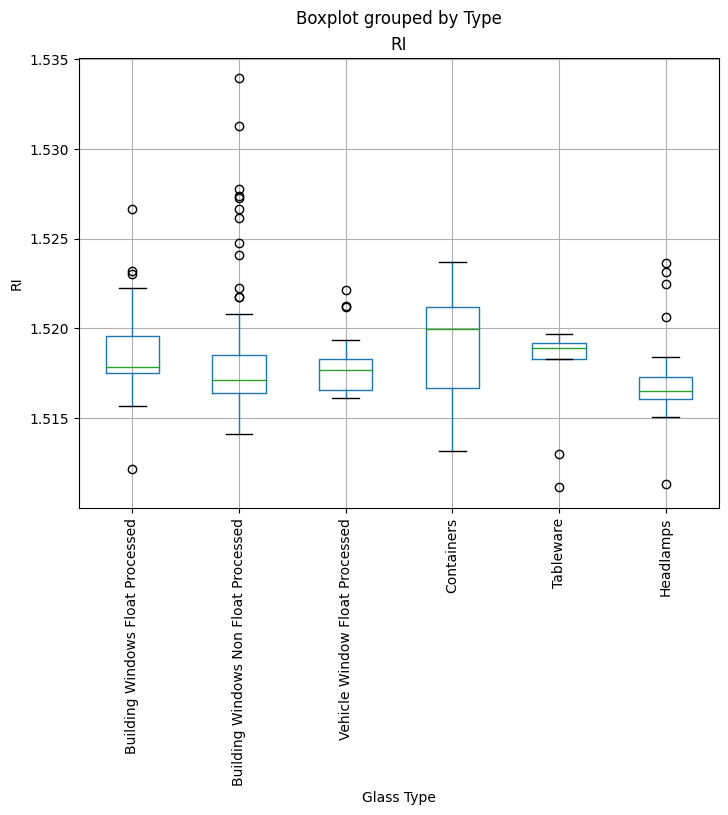

In [206]:
# plot the box plot of RI for each type of glass

df.boxplot(column='RI', by='Type', figsize=(8, 6))
plt.xlabel('Glass Type')
plt.ylabel('RI')

types_map = ['Building Windows Float Processed', 'Building Windows Non Float Processed', 'Vehicle Window Float Processed', 'Containers', 'Tableware', 'Headlamps']

plt.xticks(range(1, 7), types_map, rotation=90)

plt.show()

### Trying a Violin Plot

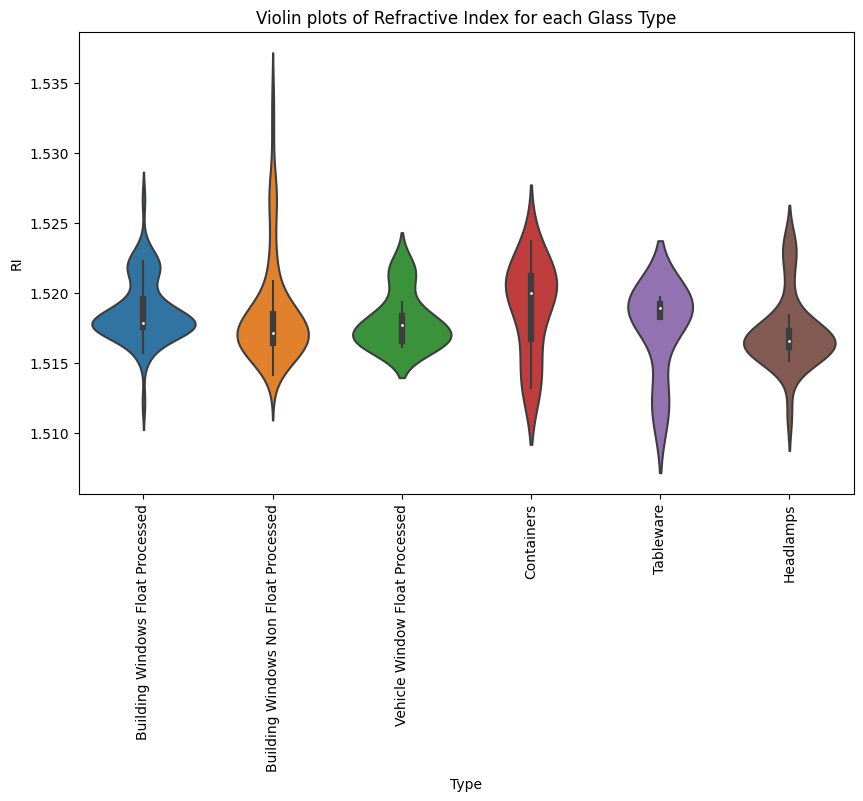

In [207]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Type', y= 'RI', data=df)
plt.title('Violin plots of Refractive Index for each Glass Type')

types_map = ['Building Windows Float Processed', 'Building Windows Non Float Processed', 'Vehicle Window Float Processed', 'Containers', 'Tableware', 'Headlamps']

plt.xticks(range(6), types_map, rotation=90)

plt.show()

One conclusion we can draw is that float processing reduces the variance of the refractive index. We can see this from the first two plots, which are the same use case (Building Windows), but there is a much more spread out distribution in case of non-float-processed glass as compared to float-processed. <br><br>
Containers have the highest refractive index, and headlamps seem to have the least.<br><br>
Also, regarding the data itself, from the bar graphs plotted previously, we can see that the average refractive indices come out to be largely similar overall, although the distributions are quite different, as demonstrated through the box plot and violin plot.

### Subtask 3: Night at the Museum

In [208]:
# import sata from museum.csv and print
with open('museum.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

headers = data.pop(0)

df = pd.DataFrame(data, columns=headers)

df

,Month,America Tropical Interpretive Center,Avila Adobe,Chinese American Museum,Gateway to Nature Center,Firehouse Museum
0,Jan 2014,6602,24778,1581,,4486
1,Feb 2014,5029,18976,1785,,4172
2,Mar 2014,8129,25231,3229,,7082
3,Apr 2014,2824,26989,2129,,6756
4,May 2014,10694,36883,3676,,10858
...,...,...,...,...,...,...
112,May 2023,3816,16085,3468,0,5565
113,Jun 2023,2227,13604,1983,0,3733
114,Jul 2023,2057,13607,1768,0,2589
115,Aug 2023,1470,11413,1428,0,3537


In [209]:
# convert all values from columns 1 to end as numeric
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)

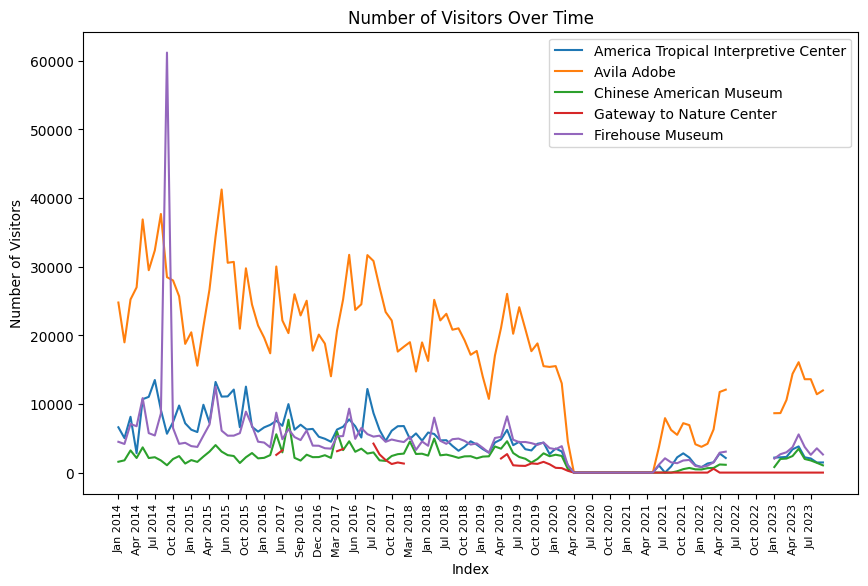

In [210]:
# plot a line plot for tracking number of visitors over time, with each museum as a separate line
df.plot(y=df.columns[1:], figsize=(10, 6))

plt.xlabel('Index')

# use the first column as the x-axis ticks with small font size. Display only every third month
plt.xticks(np.arange(0, len(df), 3), df[df.columns[0]].iloc[::3], fontsize=8, rotation=90)

plt.ylabel('Number of Visitors')

plt.title('Number of Visitors Over Time')

plt.show()

We use a line plot to track this data, because it is a continuous data over period of time. <br>
There are some observations to be made:.<br><br>First, there is one sudden spike in the Firehouse Museum in late 2014.<br>
This <i>could</i> be attributed to some event that occurred in that period, or even faulty data, both of which could require further exploration.<br>

We can also notably see the sudden drop in the number of visitors to all museums in 2020-mid 2021, which can be attributed to the COVID-19 pandemic. The numbers have not quite picked up since then, and the museums are not yet seeing the same number of visitors as pre-pandemic levels.<br>

One thing of note is that there is significant data missing for the Chinese American Museum, and towards the end, the almost exactly same value is reported over years (which is close to the pandemic value of near 0).<br>
A possible hypoethesis draws from the several news reports of prejudice against the Chinese American population during the pandemic, and one could consider the possibility that this may have led to the museum seeing little footfall. This would, however, require further investigation. <br><br>

We would need to look more into the method of getting the data, because so much data missing, as well as the sudden one-off spike (in only one reading) in the Firehouse Museum, is cause for concern in terms of the quality of the data.

## Question 4

In [211]:
# import data from ff.csv to dataframe
with open('ff.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

headers = data.pop(0)

df_ff = pd.DataFrame(data, columns=headers)

df_ff

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17,8,302,140,3449,11,1971,US.
3,15,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22,6,232,112,2835,15,1983,US.
259,18,6,232,100,3288,16,1972,US.


In [212]:
# convert columns 0, ,1 , 2, 3, 4, 5, 6 to numeric
df_ff.iloc[:, 0:7] = df_ff.iloc[:, 0:7].apply(pd.to_numeric)
df_ff

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980,US.
257,36.1,4,91.0,60,1800.0,16,1979,Japan.
258,22.0,6,232.0,112,2835.0,15,1983,US.
259,18.0,6,232.0,100,3288.0,16,1972,US.


In [213]:
# show nan rows
df_ff[df_ff.isna().any(axis=1)]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
14,19.1,6,225.0,90,NaN,19,1981,US.
33,21.0,6,199.0,90,NaN,15,1971,US.
40,16.0,6,NaN,105,3897.0,19,1976,US.
172,29.0,4,68.0,49,NaN,20,1974,Europe.
180,19.8,6,NaN,85,2990.0,18,1980,US.


In [214]:
# remove nan rows
df_ff = df_ff.dropna()
df_ff

df_ff_no_year = df_ff.copy() # for using later

In [215]:
# one hot encode the brand column
df_ff_one_hot = pd.get_dummies(df_ff, columns=['brand'])

df_ff_one_hot

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand_Europe.,brand_Japan.,brand_US.
0,14.0,8,350.0,165,4209.0,12,1972,False,False,True
1,31.9,4,89.0,71,1925.0,14,1980,True,False,False
2,17.0,8,302.0,140,3449.0,11,1971,False,False,True
3,15.0,8,400.0,150,3761.0,10,1971,False,False,True
4,30.5,4,98.0,63,2051.0,17,1978,False,False,True
...,...,...,...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980,False,False,True
257,36.1,4,91.0,60,1800.0,16,1979,False,True,False
258,22.0,6,232.0,112,2835.0,15,1983,False,False,True
259,18.0,6,232.0,100,3288.0,16,1972,False,False,True


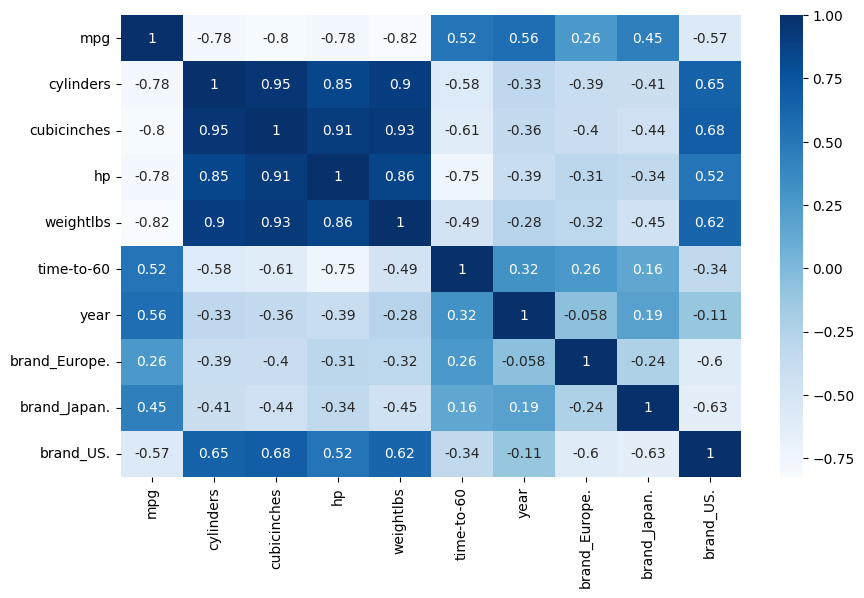

In [216]:
# plot a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df_ff_one_hot.corr(), annot=True, cmap='Blues')

plt.show()

There are some concerns with this, one of which is the presence of `Year` as a variable here. <br>
We can try removing that as follows:

In [217]:
# we use the copy we made earlier and drop the Year column from it
df_ff_no_year = df_ff_no_year.drop(['year'], axis=1)

df_ff_no_year = df_ff_no_year.groupby('brand').mean()

df_ff_no_year = df_ff_no_year.reset_index()

df_ff_no_year

,brand,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60
0,Europe.,27.476596,4.148936,109.446809,80.617021,2438.234043,17.106383
1,Japan.,30.217647,4.156863,104.215686,79.313725,2229.039216,16.411765
2,US.,19.641772,6.481013,260.044304,123.462025,3426.405063,14.721519


In [218]:
# one hot encode the brand column
df_ff_no_year_one_hot = pd.get_dummies(df_ff_no_year, columns=['brand'])

df_ff_no_year_one_hot

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,brand_Europe.,brand_Japan.,brand_US.
0,27.476596,4.148936,109.446809,80.617021,2438.234043,17.106383,True,False,False
1,30.217647,4.156863,104.215686,79.313725,2229.039216,16.411765,False,True,False
2,19.641772,6.481013,260.044304,123.462025,3426.405063,14.721519,False,False,True


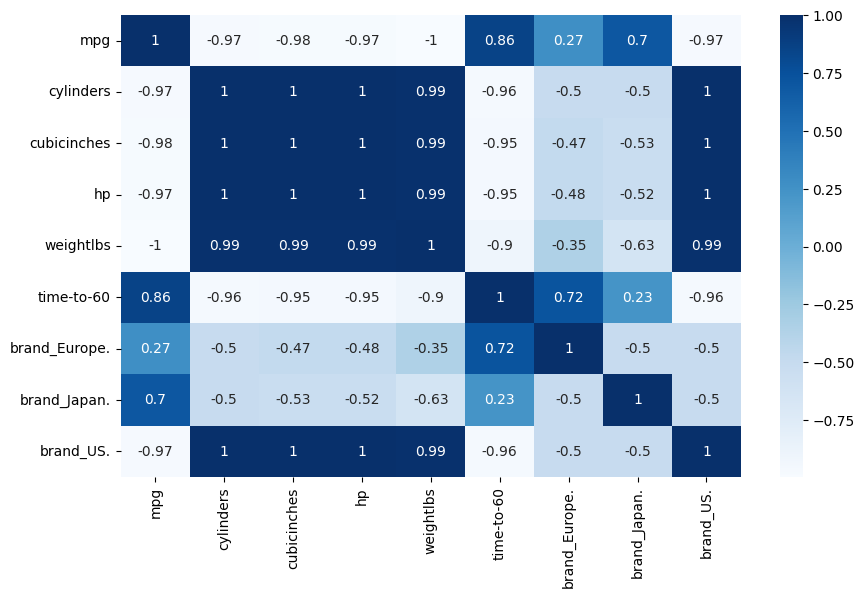

In [219]:
# plot a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df_ff_no_year_one_hot.corr(), annot=True, cmap='Blues')

plt.show()


The above correlation matrix clearly shows how each of the features are related with each other. For instance, cylinders, cubinches, horsepower, and weight are all highly correlated with each other. <br>
Furthermore, we can also see that American-made automobiles have great horsepowe,r weight, cubic inches and more cylinders (in general) where compares with Japan and Europe.<br> Europe has the greatest time-to-60, while America has the best (i.e., lowest) time-to-60. Japan has the highest mpg. <br><br>
One major disadvantage of this graph is that it required the year to be removed, and I have taken the average across the features in order to do this. However, a more nuanced approach of taking it brandwise, is also possible, and is explored below.

In [220]:
# make a df for each brand
df_e = df_ff[df_ff['brand'] == 'Europe.']
df_j = df_ff[df_ff['brand'] == 'Japan.']
df_u = df_ff[df_ff['brand'] == 'US.']

# List of dataframes
dfs = [df_e, df_j, df_u]

# Modify each dataframe
for i in range(len(dfs)):
    dfs[i] = dfs[i].drop(['brand'], axis = 1)
    dfs[i] = dfs[i].groupby(['year']).mean().reset_index()

# Assign the modified dataframes back to the original variables
df_e, df_j, df_u = dfs

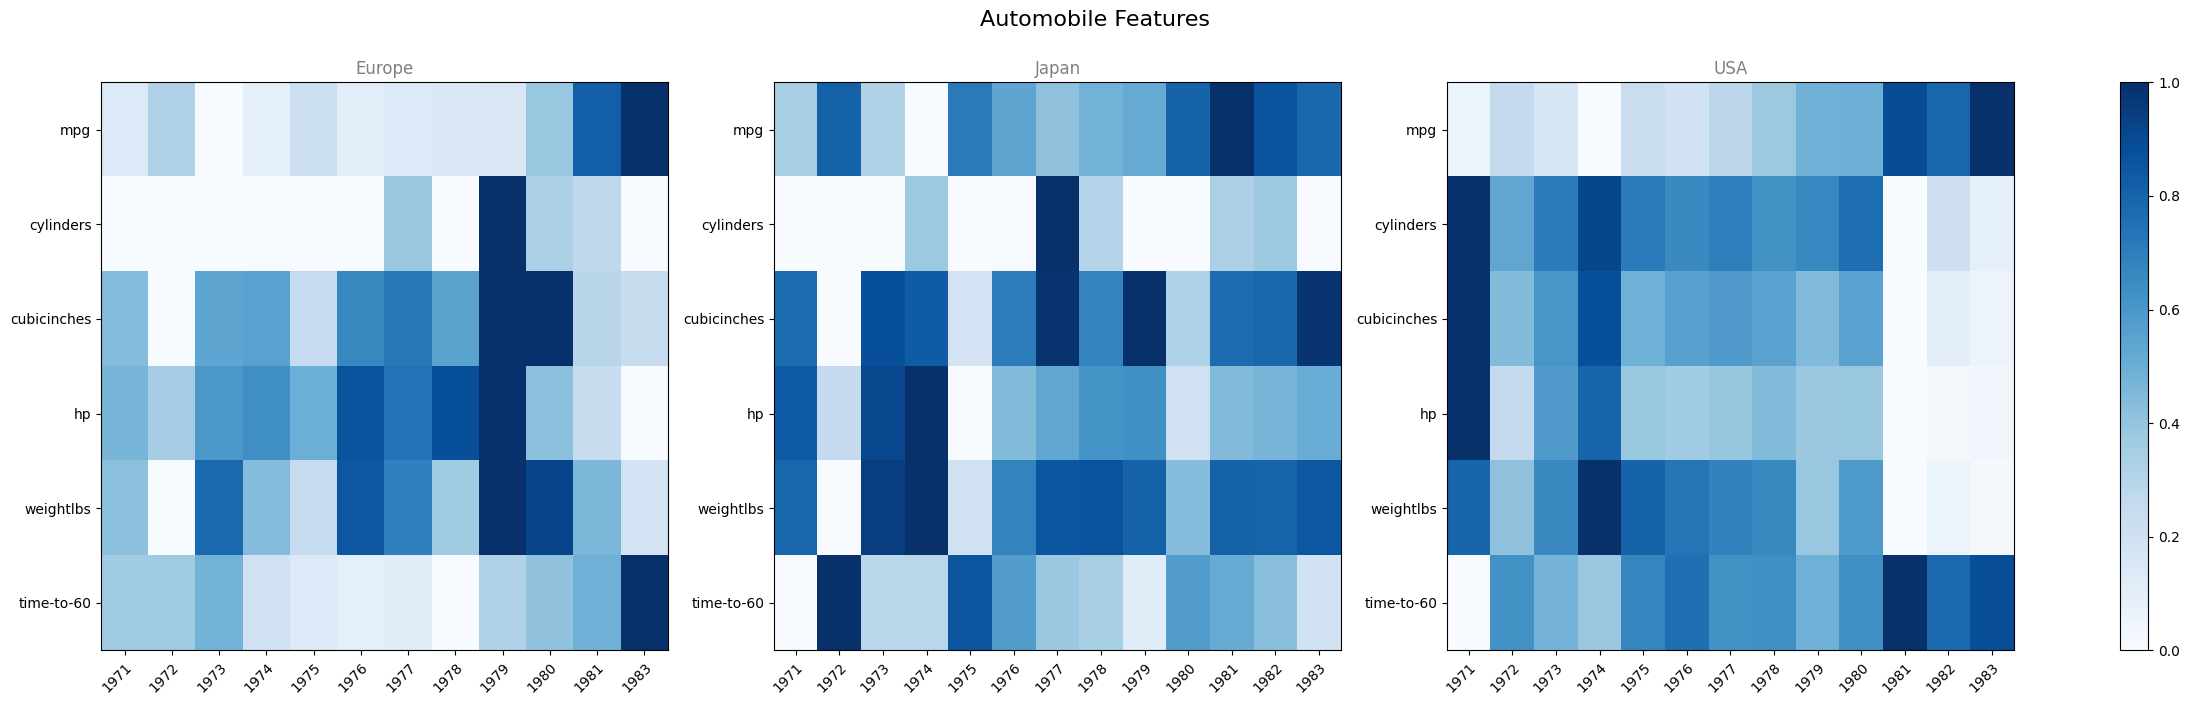

In [221]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.gridspec as gridspec

scaler = MinMaxScaler()

fig = plt.figure(figsize=(22, 7)) 
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])
axs = [plt.subplot(gs[i]) for i in range(3)]
cbar_ax = plt.subplot(gs[3])

# List of dataframes and titles
dfs = [df_e, df_j, df_u]
titles = ['Europe', 'Japan', 'USA']

for i, df_me in enumerate(dfs):
    years = df_me['year'].unique()
    features = df_me.columns[1:]
    # Fit the scaler to the data and transform it
    df_normalized = pd.DataFrame(scaler.fit_transform(df_me[features]), columns=features, index=df_me.index)

    # Transpose the DataFrame
    df_normalized = df_normalized.T

    df_list = df_normalized.values.tolist()
    df_list = np.array(df_list, dtype=float)

    im = axs[i].imshow(df_list, aspect='auto', cmap='Blues')

    axs[i].set_xticks(np.arange(len(years)))
    axs[i].set_xticklabels(years)
    axs[i].set_yticks(np.arange(len(features)))
    axs[i].set_yticklabels(features)

    plt.setp(axs[i].get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")

    axs[i].set_title(titles[i], color = 'grey', y=1.0)

fig.colorbar(im, cax=cbar_ax)

# add a title for the figure
fig.suptitle('Automobile Features', y=1.0, fontsize=16)

fig.tight_layout()
plt.show()

This shows a much more nuanced story.<br>It shows how, over the years, different brand have changed their cars.<br>
In case of Europe, we observe a steady increase in mpg, and in time-to-60. Further, we see that the horsepower was increasing quite steadily, until the last three years, where there was a drop. <br><br>
In case of Japan, we see a steady increase in mpg, and a general stable horsepower and weight over the years. <br><br>
In case of America, we see a steady increase in mpg, and a sudden decrease in the last few years in cylinder, volume, horsepower, and weight. It is clear that the previous heatmaps did not demonstrate this. <br><br><br>


Overall, it depends on what the purpose of the data is, to choose a method of heatmap. If insights about changes over years is needed and changes over brand, then the last one is best. If a relative comparison <i>between</i> the brands is needed, then the first two would be better. <br><br>

And as for choosing the best car, well, a low time-to-60 and high horsepower makes the coolest cars, so USA would win there!